In [1]:
!pip install mglearn

   ---------------------------------------- 0.0/581.4 kB ? eta -:--:--
   --------------------------------------- 581.4/581.4 kB 10.3 MB/s eta 0:00:00


# 구간 분할
- 데이터에 구간(bin)을 만들어서 구간 별 예측 수행
- 원본 데이터에 구간 정보를 부여한다.

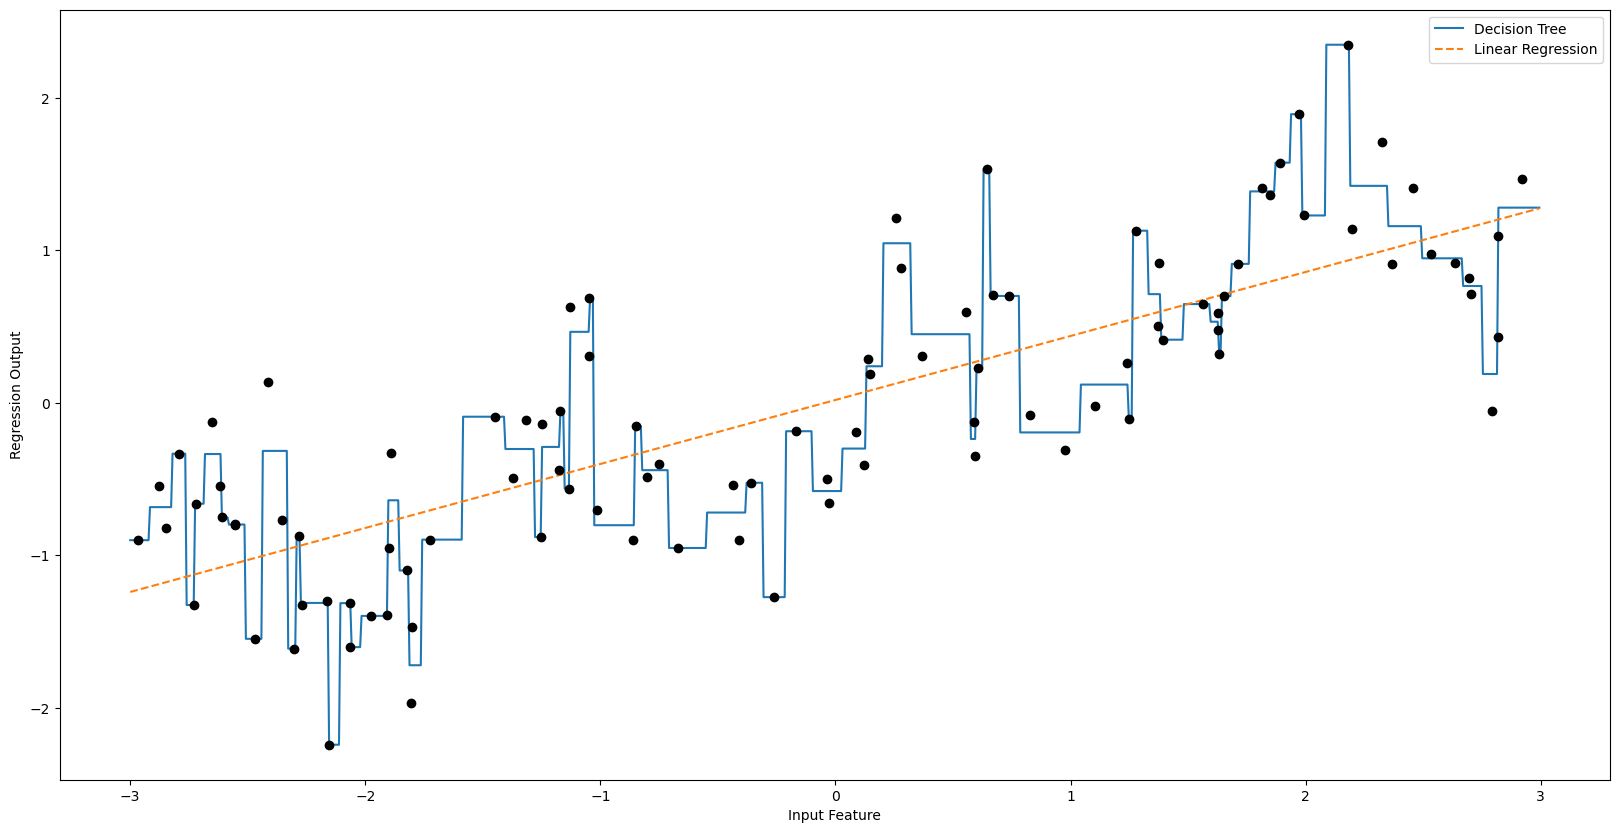

In [2]:
import matplotlib.pyplot as plt
import mglearn
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)

plt.rcParams['figure.figsize']=(20, 10)
plt.plot(line, reg.predict(line), label="Decision Tree")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), '--' , label="Linear Regression")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression Output")
plt.xlabel("Input Feature")
plt.legend(loc='best')
plt.show()

# 구간 분할 예측
- 데이터의 구간을 나눠서, 구간 정보를 투입해 각 구간별로 예측하는 기법

In [3]:
# 구간 별 예측을 수행하기 위해 구간 정보 생성
bins = np.linspace(-3, 3, 11)
bins

array([-3. , -2.4, -1.8, -1.2, -0.6,  0. ,  0.6,  1.2,  1.8,  2.4,  3. ])

In [4]:
# 연속적인 데이터들을 구간에 집어넣는 작업이 필요
#   -> 이 데이터 포인트는 여기 구간입니다.
which_bin = np.digitize(X, bins=bins)

In [5]:
print("데이터 포인트 : \n{}".format(X[:5]))
print()
print("데이터 포인트의 소속 구간 : \n{}".format(which_bin[:5]))

데이터 포인트 : 
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

데이터 포인트의 소속 구간 : 
[[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [6]:
# 구간 데이터는 정수 형식의 데이터지만, 범주형 변수의 성질
from sklearn.preprocessing import OneHotEncoder

# sparse_output=False로 설정하면 압축 행렬을 안만든다.
encoder = OneHotEncoder(sparse_output=False)

X_binned = encoder.fit_transform(which_bin)
X_binned[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

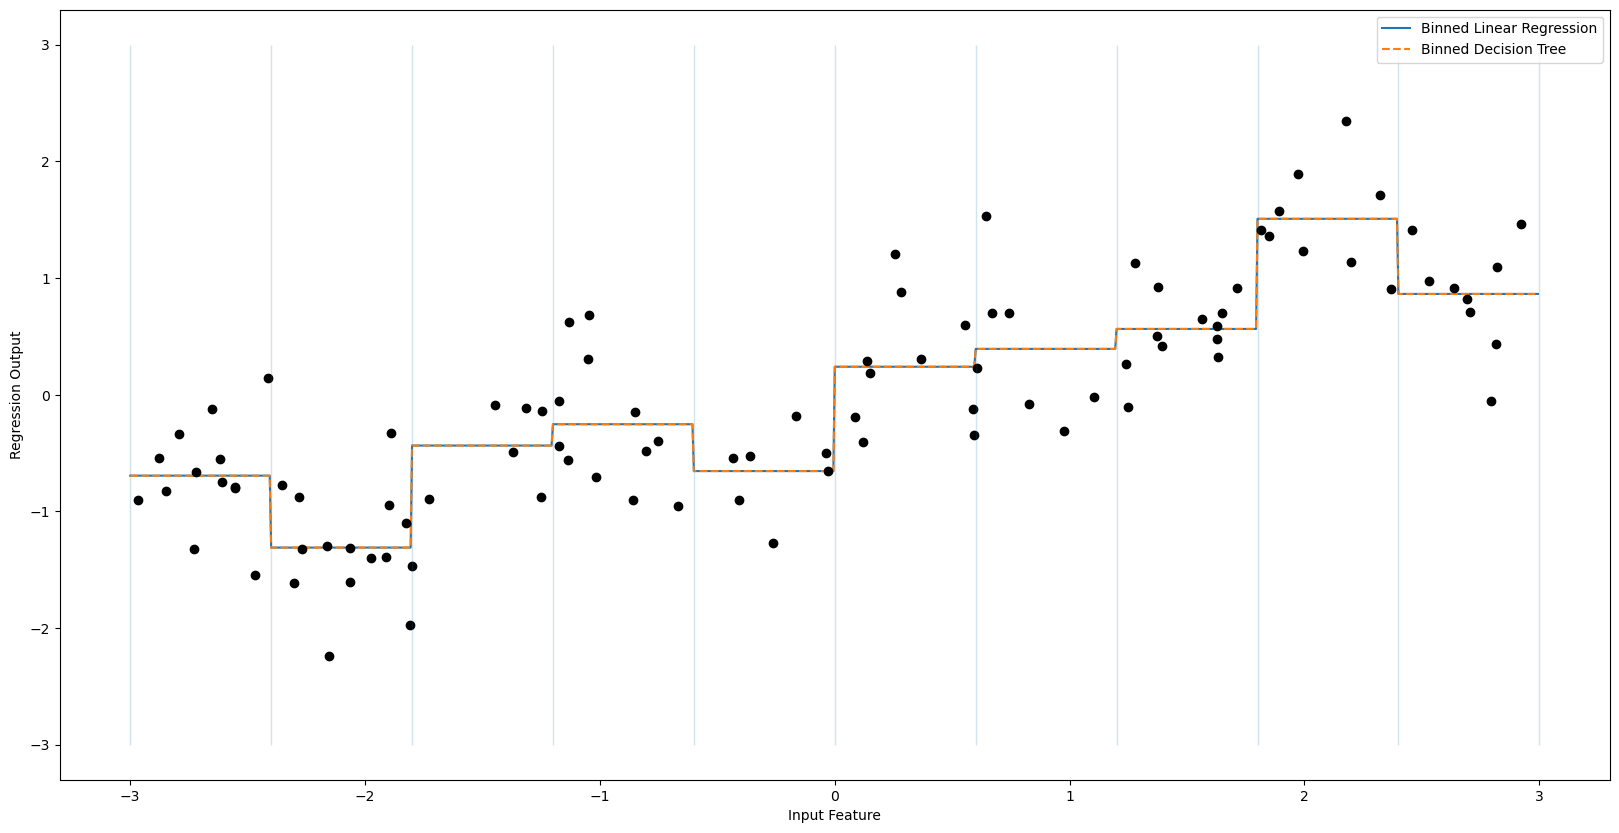

In [7]:
line_binned = encoder.transform(np.digitize(line, bins=bins))

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='Binned Linear Regression')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), '--', label='Binned Decision Tree')
plt.plot(X[:, 0], y, 'o', c='k')

plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc='best')
plt.ylabel("Regression Output")
plt.xlabel("Input Feature")
plt.show()

# 상호작용(interaction)
- 데이터끼리의 관계를 설명하는 것(특성과 특성의 곱)

In [10]:
# X의 원래 정보와, 구간 정보를 합치기
X_combined = np.hstack([X, X_binned])
X_combined[:5]

array([[-0.75275929,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 2.70428584,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 1.39196365,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ],
       [ 0.59195091,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-2.06388816,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ]])

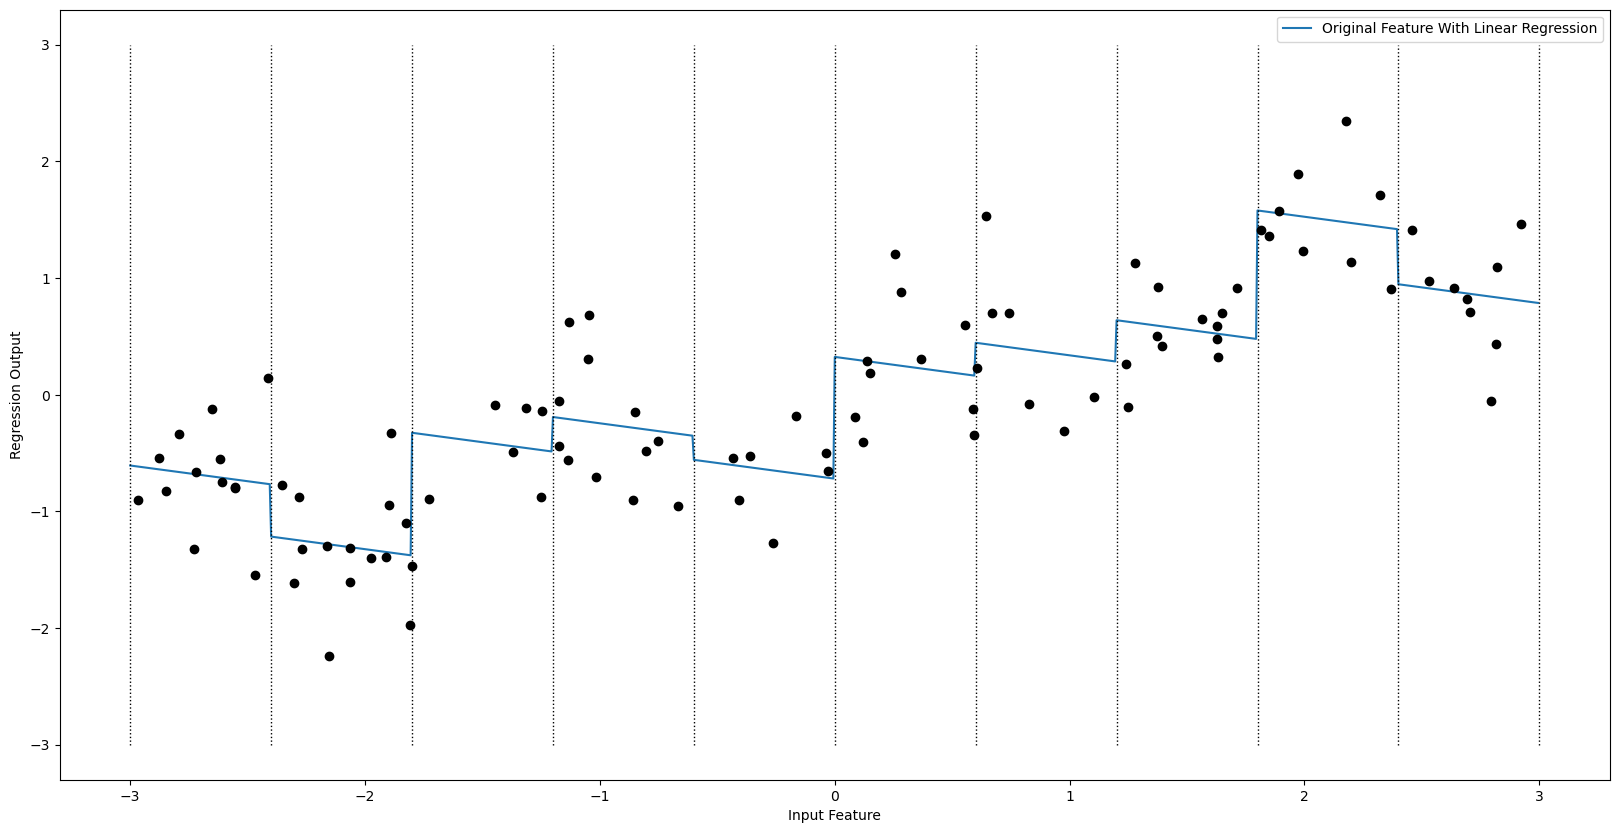

In [12]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned]) # 예측할 선에 대해서도 One-Hot-Encoding된 데이터를 추가함
plt.plot(line, reg.predict(line_combined), label='Original Feature With Linear Regression')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k', linewidth=1) #x축은 각 구간(bin, bin), y축은 -3 부터 3까지 표현

plt.legend(loc='best')
plt.ylabel("Regression Output")
plt.xlabel("Input Feature")
plt.plot(X[:, 0], y, 'o', c='k')

In [14]:
X_product = np.hstack([X_binned, X * X_binned])
X_product[:5]

array([[ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.        , -0.        , -0.        , -0.75275929, -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  2.70428584],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.39196365,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  

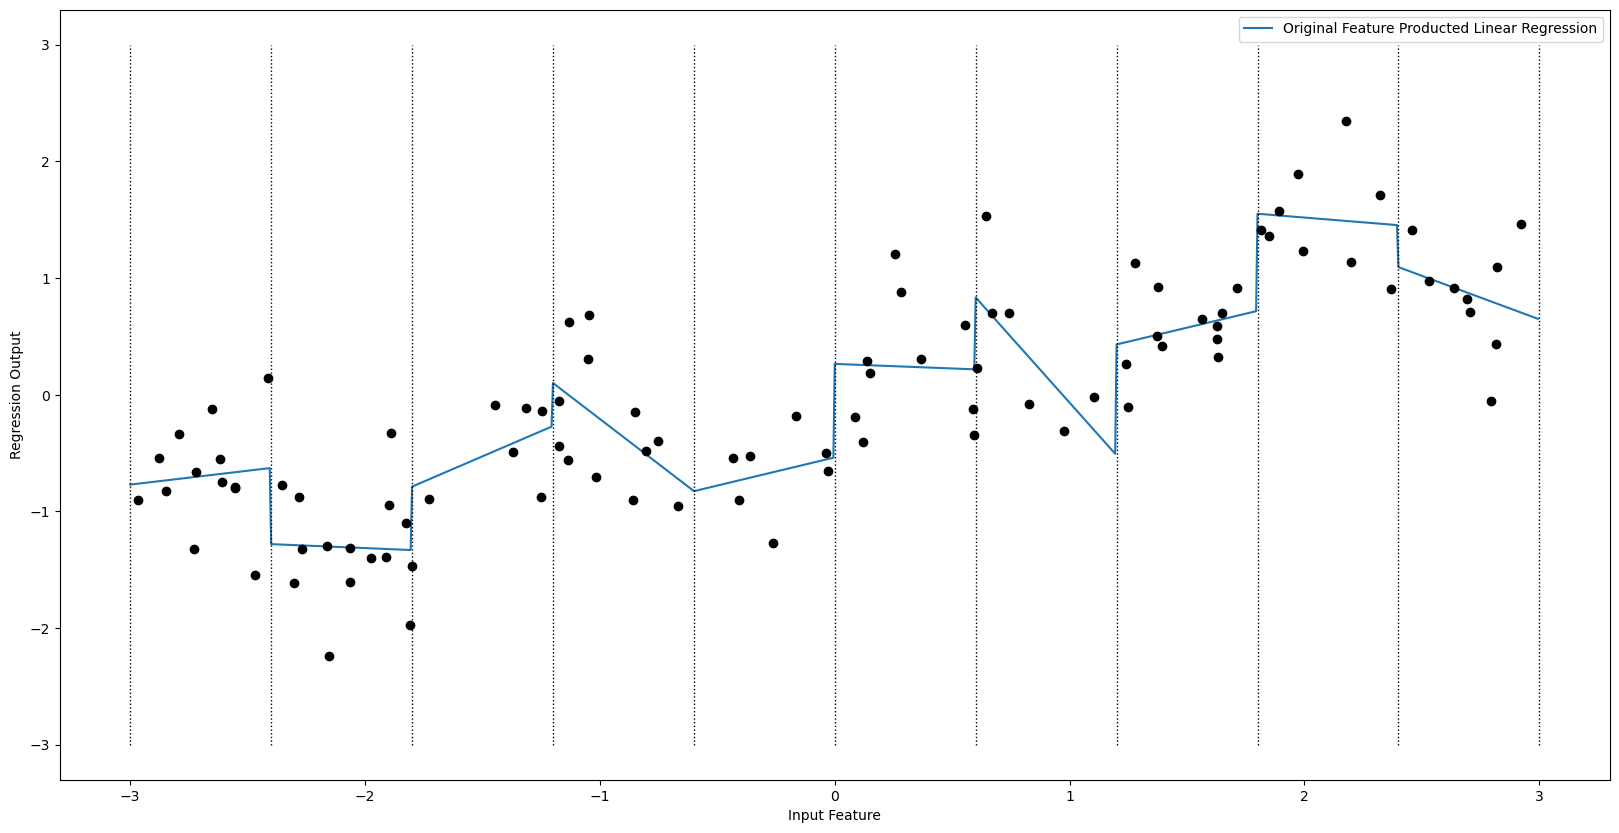

In [15]:
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned]) # 예측해야 할 데이터도 훈련한 데이터와 같이 상호작용을 구함
plt.plot(line, reg.predict(line_product), label='Original Feature Producted Linear Regression')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k', linewidth=1)

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression Output")
plt.xlabel("Input Feature")
plt.legend(loc='best')
plt.show()